In [1]:
!pip install diffusers transformers accelerate torch torchvision pillow matplotlib


In [2]:
import torch
from diffusers import StableDiffusionPipeline
import os
import matplotlib.pyplot as plt


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [3]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
output_dir = "synthetic_dataset"
os.makedirs(output_dir, exist_ok=True)


In [5]:
prompts = [
    "A beautiful sunset over mountains",
    "A futuristic city at night",
    "A robot reading a book in a library",
    "A peaceful beach with palm trees",
    "A fantasy castle in the sky"
]


In [6]:
generated_images = []

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image_path = os.path.join(output_dir, f"image_{i+1}.png")
    image.save(image_path)
    generated_images.append(image)

print("Synthetic dataset generated successfully!")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Synthetic dataset generated successfully!


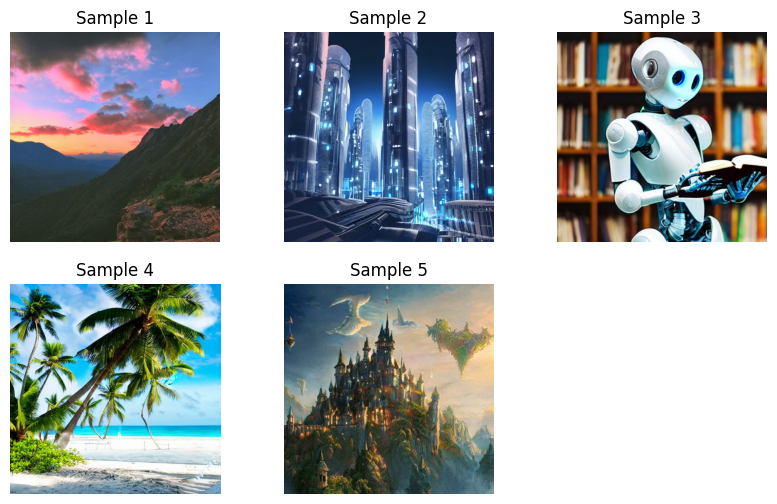

In [7]:
plt.figure(figsize=(10, 6))

for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {i+1}")

plt.show()


In [9]:
!pip install diffusers transformers accelerate torch torchvision pillow matplotlib


In [10]:
import torch
from diffusers import StableDiffusionPipeline
import os
import matplotlib.pyplot as plt


In [11]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
output_dir = "synthetic_cxr_dataset"
os.makedirs(output_dir, exist_ok=True)


In [13]:
prompts = {
    "normal_lungs": "Chest X-ray showing healthy lungs with normal anatomy, adult patient, PA view",

    "covid_opacity": "Chest X-ray showing COVID-19 infection with bilateral ground-glass opacities",

    "pleural_effusion": "Chest X-ray showing pleural effusion with blunted costophrenic angle",

    "lung_nodule": "Chest X-ray showing solitary pulmonary nodule in right lung",

    "cardiomegaly": "Chest X-ray showing cardiomegaly with enlarged cardiac silhouette",

    "medical_device": "Chest X-ray showing pacemaker with visible leads",

    "imaging_artifact": "Chest X-ray with motion blur and low exposure noise",

    "ap_view": "Chest X-ray taken in AP view with supine positioning",

    "domain_shift": "Chest X-ray from different hospital scanner with low resolution"
}


In [14]:
generated_images = {}

for name, prompt in prompts.items():
    image = pipe(prompt).images[0]
    file_path = os.path.join(output_dir, f"{name}.png")
    image.save(file_path)
    generated_images[name] = image

print("Synthetic Chest X-ray dataset generated successfully!")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Synthetic Chest X-ray dataset generated successfully!


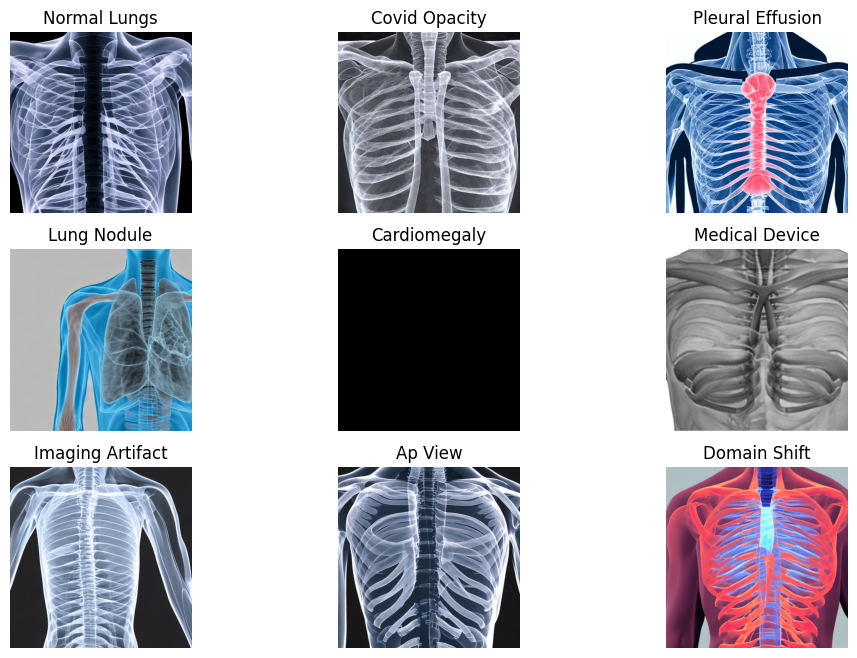

In [15]:
plt.figure(figsize=(12, 8))

for i, (name, img) in enumerate(generated_images.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(name.replace("_", " ").title())
    plt.axis("off")

plt.show()


In [16]:
os.listdir("synthetic_cxr_dataset")


['medical_device.png',
 'imaging_artifact.png',
 'normal_lungs.png',
 'cardiomegaly.png',
 'domain_shift.png',
 'pleural_effusion.png',
 'ap_view.png',
 'covid_opacity.png',
 'lung_nodule.png']

In [17]:
!zip -r synthetic_cxr_dataset.zip synthetic_cxr_dataset


  adding: synthetic_cxr_dataset/ (stored 0%)
  adding: synthetic_cxr_dataset/medical_device.png (deflated 0%)
  adding: synthetic_cxr_dataset/imaging_artifact.png (deflated 0%)
  adding: synthetic_cxr_dataset/normal_lungs.png (deflated 0%)
  adding: synthetic_cxr_dataset/cardiomegaly.png (deflated 90%)
  adding: synthetic_cxr_dataset/domain_shift.png (deflated 0%)
  adding: synthetic_cxr_dataset/pleural_effusion.png (deflated 0%)
  adding: synthetic_cxr_dataset/ap_view.png (deflated 0%)
  adding: synthetic_cxr_dataset/covid_opacity.png (deflated 0%)
  adding: synthetic_cxr_dataset/lung_nodule.png (deflated 0%)


In [18]:
!pip install diffusers transformers accelerate torch torchvision pillow matplotlib


In [19]:
import torch
from diffusers import StableDiffusionPipeline
import os
import matplotlib.pyplot as plt


In [20]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [21]:
output_dir = "synthetic_cxr_dataset"
os.makedirs(output_dir, exist_ok=True)


In [22]:
prompts = {
    # Normal anatomy – healthy lungs, age & gender variations
    "normal_healthy_adult": "Chest X-ray showing healthy lungs with normal anatomy, adult patient, PA view",
    "normal_elderly_female": "Chest X-ray showing healthy lungs in elderly female with age related changes",

    # Infectious patterns – bacterial/viral pneumonia, COVID-like opacities
    "bacterial_pneumonia": "Chest X-ray showing bacterial pneumonia with lobar consolidation",
    "viral_pneumonia": "Chest X-ray showing viral pneumonia with bilateral patchy opacities",
    "covid_opacities": "Chest X-ray showing COVID-19 infection with bilateral ground glass opacities",

    # Lung opacities – focal, diffuse, ground-glass, consolidations
    "focal_opacity": "Chest X-ray showing focal lung opacity",
    "diffuse_opacity": "Chest X-ray showing diffuse bilateral lung opacities",
    "ground_glass": "Chest X-ray showing ground glass opacities",
    "lung_consolidation": "Chest X-ray showing lung consolidation",

    # Pleural conditions – pleural effusion, pneumothorax
    "pleural_effusion": "Chest X-ray showing pleural effusion with blunted costophrenic angle",
    "pneumothorax": "Chest X-ray showing pneumothorax with collapsed lung",

    # Structural lesions – nodules, masses, fibrosis
    "lung_nodule": "Chest X-ray showing solitary pulmonary nodule",
    "lung_mass": "Chest X-ray showing large lung mass",
    "lung_fibrosis": "Chest X-ray showing pulmonary fibrosis with reticular pattern",

    # Cardiac findings – cardiomegaly, vascular congestion
    "cardiomegaly": "Chest X-ray showing cardiomegaly with enlarged cardiac silhouette",
    "vascular_congestion": "Chest X-ray showing pulmonary vascular congestion",

    # Medical devices – tubes, catheters, pacemakers
    "endotracheal_tube": "Chest X-ray showing endotracheal tube placement",
    "central_catheter": "Chest X-ray showing central venous catheter",
    "pacemaker": "Chest X-ray showing implanted pacemaker with leads",

    # Imaging artifacts – noise, motion blur, exposure issues
    "noise_artifact": "Chest X-ray with high image noise due to low exposure",
    "motion_blur": "Chest X-ray with motion blur artifact",
    "overexposure": "Overexposed chest X-ray with loss of lung details",

    # View & positioning – PA/AP views, rotation, supine/erect
    "pa_view": "Chest X-ray in PA view with proper positioning",
    "ap_view": "Chest X-ray in AP view with supine positioning",
    "rotated_view": "Chest X-ray showing rotated patient",
    "erect_view": "Chest X-ray taken in erect position",

    # Domain shift – scanner, hospital, and resolution variations
    "low_resolution": "Chest X-ray from low resolution scanner",
    "different_hospital": "Chest X-ray from different hospital imaging system"
}


In [23]:
generated_images = {}

for name, prompt in prompts.items():
    image = pipe(prompt).images[0]
    save_path = os.path.join(output_dir, f"{name}.png")
    image.save(save_path)
    generated_images[name] = image

print("✅ Complete synthetic Chest X-ray dataset generated")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Complete synthetic Chest X-ray dataset generated


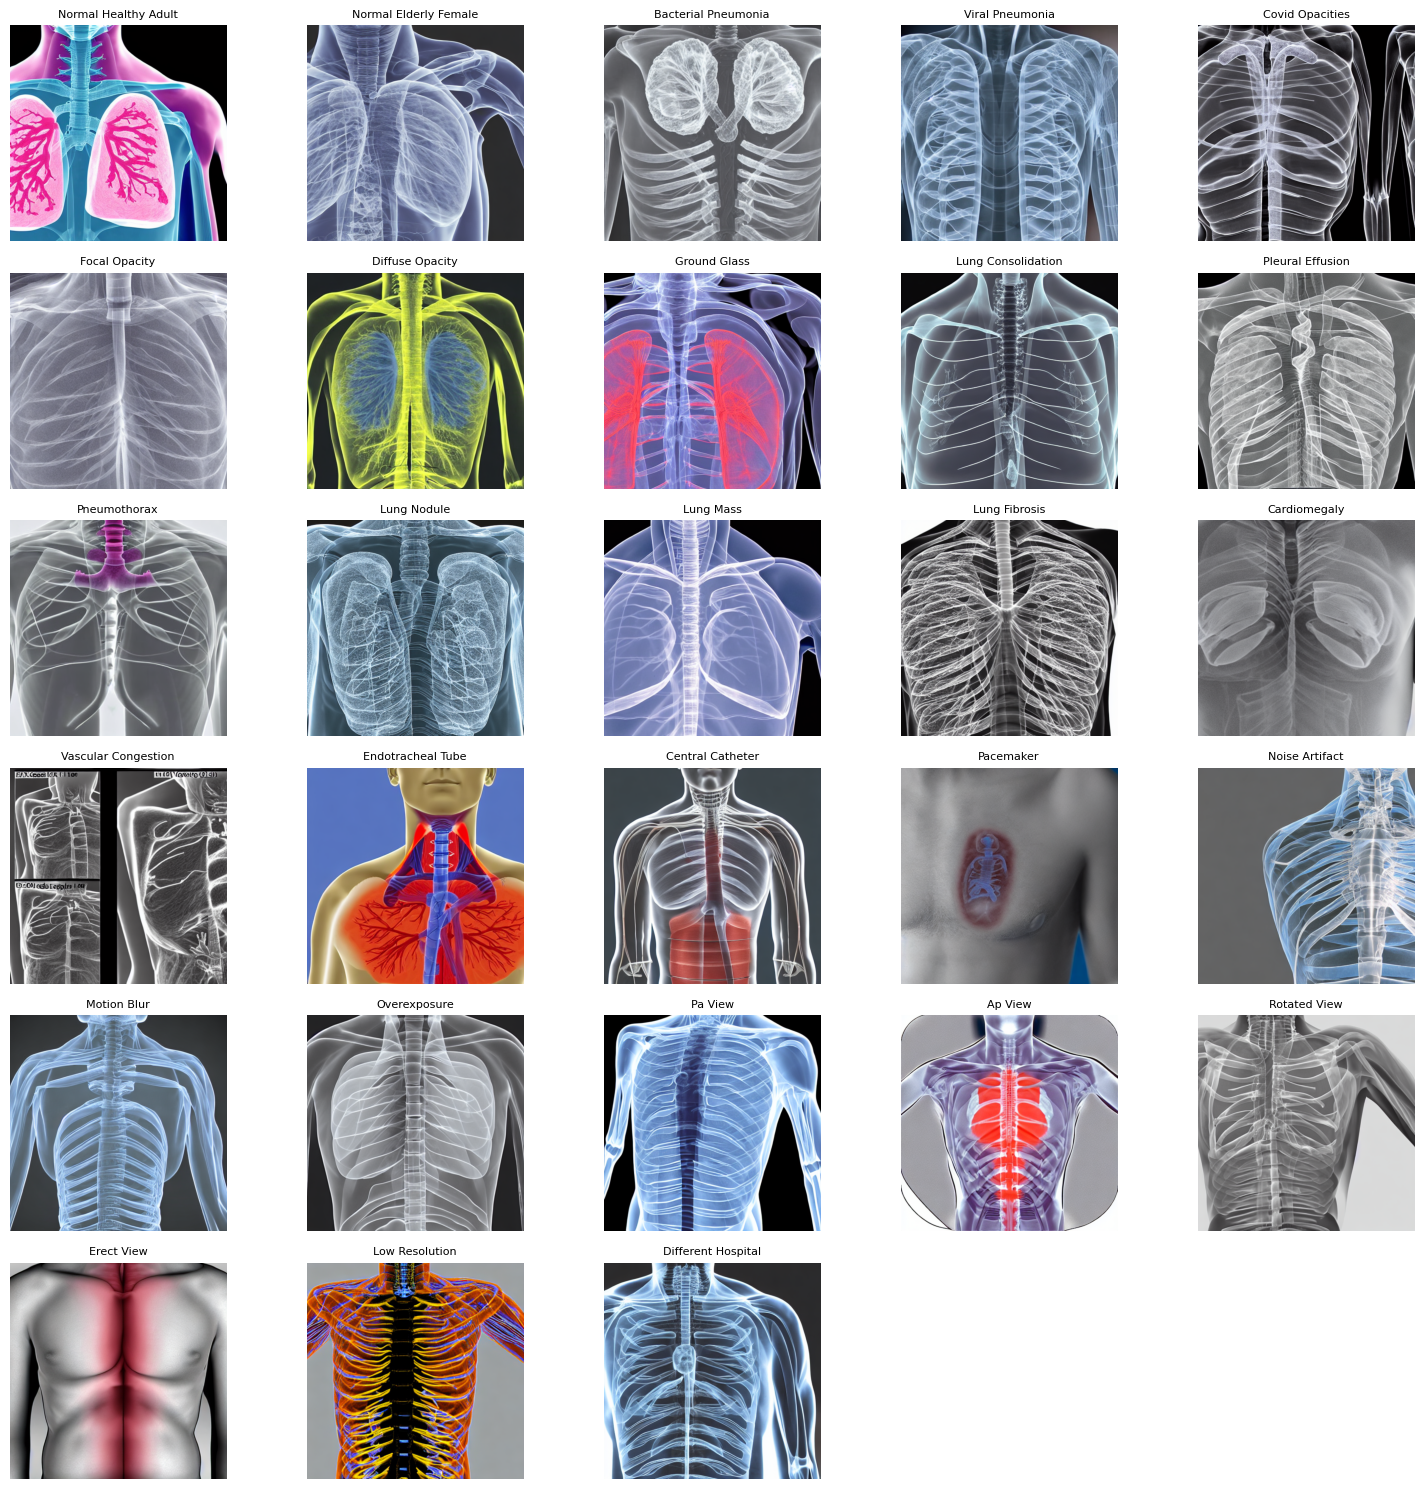

In [24]:
plt.figure(figsize=(15, 15))

for i, (name, img) in enumerate(generated_images.items()):
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.title(name.replace("_", " ").title(), fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [25]:
os.listdir("synthetic_cxr_dataset")


['different_hospital.png',
 'normal_elderly_female.png',
 'ground_glass.png',
 'noise_artifact.png',
 'medical_device.png',
 'imaging_artifact.png',
 'erect_view.png',
 'lung_consolidation.png',
 'diffuse_opacity.png',
 'endotracheal_tube.png',
 'viral_pneumonia.png',
 'low_resolution.png',
 'normal_lungs.png',
 'covid_opacities.png',
 'normal_healthy_adult.png',
 'bacterial_pneumonia.png',
 'cardiomegaly.png',
 'domain_shift.png',
 'lung_mass.png',
 'pleural_effusion.png',
 'ap_view.png',
 'central_catheter.png',
 'focal_opacity.png',
 'covid_opacity.png',
 'lung_nodule.png',
 'rotated_view.png',
 'pneumothorax.png',
 'motion_blur.png',
 'pa_view.png',
 'lung_fibrosis.png',
 'overexposure.png',
 'pacemaker.png',
 'vascular_congestion.png']

In [26]:
!zip -r synthetic_cxr_dataset.zip synthetic_cxr_dataset


updating: synthetic_cxr_dataset/ (stored 0%)
updating: synthetic_cxr_dataset/medical_device.png (deflated 0%)
updating: synthetic_cxr_dataset/imaging_artifact.png (deflated 0%)
updating: synthetic_cxr_dataset/normal_lungs.png (deflated 0%)
updating: synthetic_cxr_dataset/cardiomegaly.png (deflated 0%)
updating: synthetic_cxr_dataset/domain_shift.png (deflated 0%)
updating: synthetic_cxr_dataset/pleural_effusion.png (deflated 0%)
updating: synthetic_cxr_dataset/ap_view.png (deflated 0%)
updating: synthetic_cxr_dataset/covid_opacity.png (deflated 0%)
updating: synthetic_cxr_dataset/lung_nodule.png (deflated 0%)
  adding: synthetic_cxr_dataset/different_hospital.png (deflated 0%)
  adding: synthetic_cxr_dataset/normal_elderly_female.png (deflated 0%)
  adding: synthetic_cxr_dataset/ground_glass.png (deflated 0%)
  adding: synthetic_cxr_dataset/noise_artifact.png (deflated 0%)
  adding: synthetic_cxr_dataset/erect_view.png (deflated 0%)
  adding: synthetic_cxr_dataset/lung_consolidation.pn